In [1]:
# bus_analyser.py

import csv, re

In [2]:
import datetime

In [163]:
datetime.datetime.strptime("* 22:54", "* %H:%M")

datetime.datetime(1900, 1, 1, 22, 54)

In [49]:
d = datetime.datetime.now()

In [164]:
METADATA_COLS = 4

def read_bus_csv(filepath, encoding="1251", delimiter="\t"):
    with open(test_filepath, encoding=encoding) as f:
        data = list(csv.reader(f, delimiter=delimiter))
        
    header = data[0]
    # вычистить пустые и лишние строки
    rows = [row for row in data if not(row == header or "==/==" in row)]
    
    data = []
    for row in rows:  # (в прямой хронологии)
        d = dict(zip(header[:METADATA_COLS], row[:METADATA_COLS]))
        d["forecast"] = row[METADATA_COLS:]
        d["buses"] = [i for i,v in enumerate(d["forecast"]) if v.startswith("*")]
        data.append(d)

    return header, data
    

In [172]:
test_filepath = "../saved/65 - na Tulaka.tsv"

In [173]:
header, data = read_bus_csv(test_filepath)

In [174]:
len(data)

9522

In [175]:
header[:6]

['Дата', 'День', 'Время', 'Обновл.', 'ЦСМ (А)', 'ул.Танкистов (А)']

In [176]:
METADATA_COLS = 4

In [177]:
desired_stop = 'Дом детского творчества (Б)'
desired_index = header.index(desired_stop) - METADATA_COLS
desired_index

9

In [178]:
data[8].keys()

dict_keys(['Дата', 'День', 'Время', 'Обновл.', 'forecast', 'buses'])

In [179]:
data[8]

{'Дата': '2020.08.17',
 'День': 'ПН',
 'Время': '12:24',
 'Обновл.': '14:24:26',
 'forecast': ['14:43',
  '14:50',
  '14:53',
  '14:55',
  '14:57',
  '* 14:25',
  '14:26',
  '14:27',
  '14:29',
  '14:30',
  '14:32',
  '14:33',
  '14:35',
  '14:37',
  '14:38',
  '14:40',
  '14:41',
  '14:42',
  '14:43',
  '14:46',
  '* 14:24',
  '14:26',
  '14:27',
  '14:29',
  '14:30',
  '14:30',
  '14:32',
  '14:33',
  '14:35',
  '14:37',
  '14:38'],
 'buses': [5, 20]}

In [180]:
HH_MM_re = re.compile("\d\d:\d\d")

def row2time(time_captured_str, foreacst_str):
    date = datetime.datetime.strptime(time_captured_str, "%H:%M:%S")
    foreacst_str = HH_MM_re.search(foreacst_str).group(0)
    forecast = datetime.datetime.strptime(foreacst_str, "%H:%M")
    if date > forecast and (date - forecast).seconds >= 12 * 3600:
        # wrap the end of day
        forecast = forecast + datetime.timedelta(days=1)
    return forecast
    
row2time('14:24:26', '* 11:23').strftime("%H:%M (%d)")

'11:23 (01)'

In [182]:
arrival_times = []  # for desired_stop

INF = 1000
stops_before = INF
stops_after = INF
prev_stops_before = stops_before
prev_stops_after = stops_after
             # len(data)-40
for i in range(0, len(data) - 0):
    d = data[i]
    buses_before = [stop_i for stop_i in d["buses"] if stop_i <= desired_index]
    stops_before = abs(max(buses_before) - desired_index)  if buses_before else INF
    buses_after = [stop_i for stop_i in d["buses"] if stop_i > desired_index]
    stops_after = abs(min(buses_after) - desired_index)  if buses_after else INF
    
    if (
        stops_before > prev_stops_before and prev_stops_before < 5
        and
        stops_after < prev_stops_after and stops_after < 5
    ):
        arrival_d = data[i-1]
#         arrival_times.append(f"{arrival_d['Дата']}, {arrival_d['День']}: {arrival_d['forecast'][desired_index]}")
#         arrival_times.append({f"{arrival_d['Дата']}, {arrival_d['День']}": 
#                               row2time(arrival_d['Обновл.'], arrival_d['forecast'][desired_index])})
        result_d = arrival_d.copy()
        del result_d['buses']
        result_d['forecast'] = row2time(arrival_d['Обновл.'], arrival_d['forecast'][desired_index])
        arrival_times.append(result_d)
#         print("*")
#     print(prev_stops_before, stops_before, ";", prev_stops_after, stops_after)
    
    prev_stops_before = stops_before
    prev_stops_after = stops_after
    


len(arrival_times)

961

In [183]:
a = -120
arrival_times[a:a+20]

[{'Дата': '2020.09.03',
  'День': 'ЧТ',
  'Время': '18:55',
  'Обновл.': '18:55:32',
  'forecast': datetime.datetime(1900, 1, 1, 19, 6)},
 {'Дата': '2020.09.03',
  'День': 'ЧТ',
  'Время': '19:05',
  'Обновл.': '19:05:30',
  'forecast': datetime.datetime(1900, 1, 1, 19, 6)},
 {'Дата': '2020.09.03',
  'День': 'ЧТ',
  'Время': '19:18',
  'Обновл.': '19:17:46',
  'forecast': datetime.datetime(1900, 1, 1, 19, 18)},
 {'Дата': '2020.09.03',
  'День': 'ЧТ',
  'Время': '19:38',
  'Обновл.': '19:37:46',
  'forecast': datetime.datetime(1900, 1, 1, 19, 37)},
 {'Дата': '2020.09.03',
  'День': 'ЧТ',
  'Время': '19:56',
  'Обновл.': '19:56:11',
  'forecast': datetime.datetime(1900, 1, 1, 19, 57)},
 {'Дата': '2020.09.03',
  'День': 'ЧТ',
  'Время': '20:16',
  'Обновл.': '20:16:11',
  'forecast': datetime.datetime(1900, 1, 1, 20, 17)},
 {'Дата': '2020.09.03',
  'День': 'ЧТ',
  'Время': '21:17',
  'Обновл.': '21:16:46',
  'forecast': datetime.datetime(1900, 1, 1, 21, 17)},
 {'Дата': '2020.09.03',
  'Де

In [184]:
import matplotlib.pyplot as plt

In [185]:
times = [d['forecast'] for d in arrival_times]

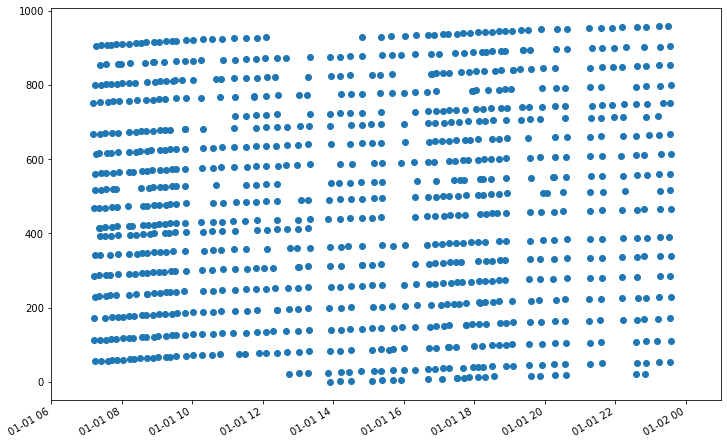

In [186]:
plt.figure(figsize=(12, 8))
axes = plt.gca()
axes.set_xlim([datetime.datetime(1900, 1, 1, 6, 0), datetime.datetime(1900, 1, 2, 1, 0)])
plt.gcf().autofmt_xdate()  # поворот подписей

plt.scatter(times, range(len(times)), marker="o")

In [187]:
BeginOfTime = datetime.datetime(1900, 1, 1, 6, 0)

def time2int(t) -> "minutes":
    return (t - BeginOfTime).seconds // 60
def int2time(minutes):
    return BeginOfTime + datetime.timedelta(minutes=minutes)

times_as_int = [time2int(t) for t in times]

In [209]:
class NumbersCluster:
    def __init__(self, span=10, items=None):
        self.span = span
        self.items = items or []
        
    def get_middle(self):
        if not self.items:
            return None
        return(min(self.items) + max(self.items)) / 2
        
    def get_range(self):
        if not self.items:
            return 0
        return max(self.items) - min(self.items)
        
    def distance(self, item):
        if not self.items:
            return 0
        return abs(self.get_middle() - item)
    
    def can_add(self, item):
        return self.distance(item) <= self.span
    
    def add(self, item):
        if self.can_add(item):
            self.items.append(item)
            return True
        return False
        
class ClustersSet:
    def __init__(self, сluster_class=NumbersCluster, creation_params=dict(span=10)):
        self.сluster_class = сluster_class
        self.creation_params = creation_params
        self.сlusters = []
        
    def accept_item(self, item):
        if not any(c.can_add(item) for c in self.сlusters):
            c = self.сluster_class(**self.creation_params)
            c.add(item)
            self.сlusters.append(c)
        else:
            distances = [cl.distance(item) for cl in self.сlusters]
            i = distances.index(min(distances))
            self.сlusters[i].add(item)
        
    def accept_items(self, items):
        for item in items:
            self.accept_item(item)
        
    
        

In [211]:
cs = ClustersSet(creation_params=dict(span=10))
cs.accept_items(times_as_int)

len(cs.сlusters)

58

In [213]:
сlusters = cs.сlusters.copy()
сlusters.sort(key=lambda cl:cl.get_middle())
clusterized = [int2time(cl.get_middle()) for cl in сlusters]
counts = [len(cl.items) for cl in сlusters]
for cl in сlusters:
    L = len(cl.items)
    print(f"{int2time(cl.get_middle())}  {('='*L + str(L)).ljust(33)} ±{str(cl.get_range()/2).replace('.0','')}")

1900-01-01 07:16:30  ===============15                 ±4.5
1900-01-01 07:27:30  =======================23         ±5.5
1900-01-01 07:39:00  ========================24        ±6
1900-01-01 07:50:30  ==================18              ±4.5
1900-01-01 08:01:00  ======6                           ±2
1900-01-01 08:18:30  ==============================30  ±7.5
1900-01-01 08:35:00  ==============14                  ±4
1900-01-01 08:47:30  ====================20            ±5.5
1900-01-01 08:59:30  ==============================30  ±6.5
1900-01-01 09:19:00  ===========================27     ±7
1900-01-01 09:29:30  ====================20            ±4.5
1900-01-01 09:46:30  ==================18              ±3.5
1900-01-01 10:01:30  ======6                           ±0.5
1900-01-01 10:17:30  ==============14                  ±2.5
1900-01-01 10:37:00  ==============14                  ±4
1900-01-01 10:50:30  ===============15                 ±2.5
1900-01-01 11:14:30  =================17          

<BarContainer object of 111 artists>

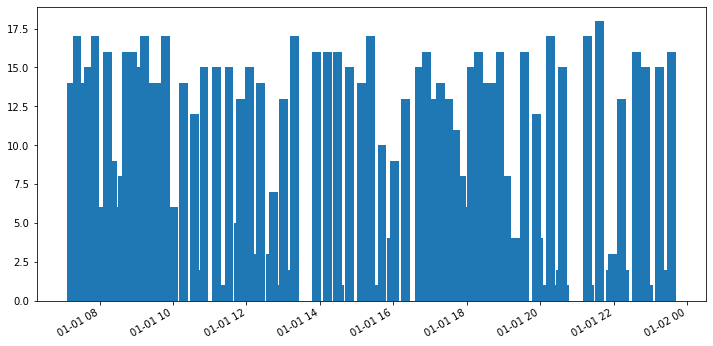

In [160]:
plt.figure(figsize=(12, 6))
axes = plt.gca()
# axes.set_xlim([datetime.datetime(1900, 1, 1, 6, 0), datetime.datetime(1900, 1, 2, 1, 0)])
plt.gcf().autofmt_xdate()  # поворот подписей

plt.bar(clusterized, counts, width=0.01, )